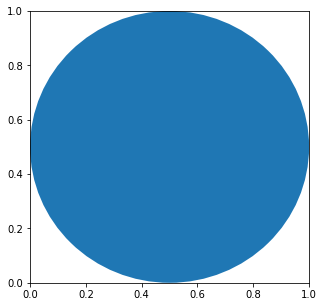

In [14]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import *

c = Circle(xy=(0.5, 0.5), radius=0.5)
r = Rectangle(xy=(70, 70), width=5, height=5)
p = Polygon(xy=[[10,10], [15,15], [20, 20]], closed=True)

fig, ax = plt.subplots(figsize=(5, 5))
ax.add_artist(c)

In [7]:


np.random.rand(3, 2)

array([[0.53615368, 0.4179755 ],
       [0.64598794, 0.74894972],
       [0.50615654, 0.0209044 ]])